# MC for linear regressions using METAS uncLib

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from metas_unclib import *
import numpy as np
use_mcprop(n=100000)

In [2]:
vecTemp = np.array([22.25, 16.125, 19, 22.375, 25.625, 28.625, 31.375, 34.1875, 23])
NT = vecTemp.size
covTemp = np.eye(NT)
uvecTemp=ufloatarray(vecTemp, (0.5**2)*covTemp)

In [3]:
vecSens = np.array([0.998607574, 1.000268825, 0.999958121, 0.999638246, 0.999255214, 0.998744568, 0.998172623, 0.997269868, 1.000037044])
NS = vecSens.size
covSens = np.eye(NS)
uvecSens=ufloatarray(vecSens, (0.001**2)*covSens)

In [4]:
p = unumlib.polyfit( uvecTemp, uvecSens, 1)

In [5]:
p

array([-0.0001514626594934624 ± 6.0724117673426386e-05,
       1.0028520920678181 ± 0.0015380793340930496], dtype=object)

In [6]:
p_net_object = p[0].net_object

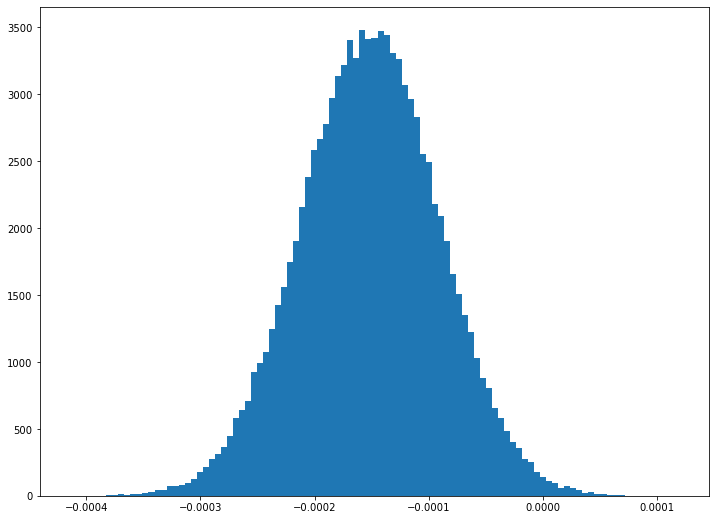

In [7]:
p_values = [float(slope) for slope in p_net_object.values]
fig, ax = plt.subplots(figsize=(12, 9))
h = ax.hist(p_values, bins=101)

In [8]:
p_net_object = p[1].net_object

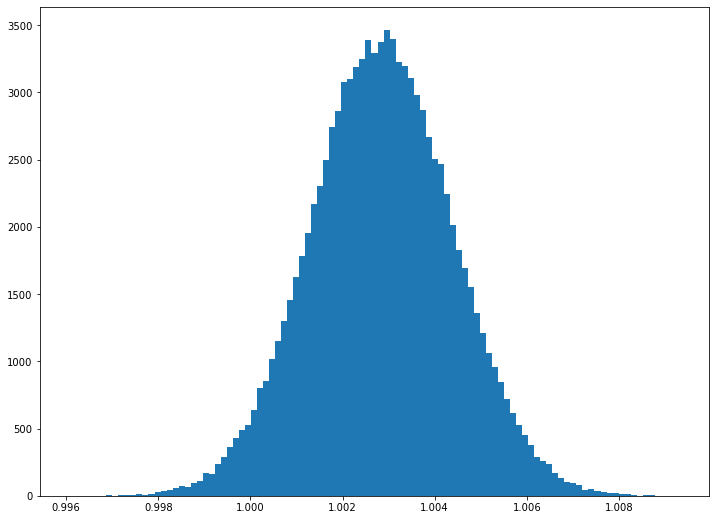

In [9]:
p_values = [float(slope) for slope in p_net_object.values]
fig, ax = plt.subplots(figsize=(12, 9))
h = ax.hist(p_values, bins=101)

In [10]:
pFit=np.polyfit(get_value(uvecTemp),get_value(uvecSens), 1, full=True)
pFit

(array([-1.52313046e-04,  1.00287312e+00]),
 array([1.56339895e-06]),
 2,
 array([1.40578631, 0.15415852]),
 1.9984014443252818e-15)

In [11]:
uvecSensI=unumlib.polyval(p,uvecTemp)

In [12]:
uvecSensI

array([0.9994810293889594 ± 0.00037279260626854247,
       1.000408843346987 ± 0.0006206561698570859,
       0.9999737545107016 ± 0.0004861379132694398,
       0.9994627744342678 ± 0.0003705813091263065,
       0.9989711317015577 ± 0.0003462774280084709,
       0.9985170011903646 ± 0.0004150168569394817,
       0.9981008145886338 ± 0.000527043026982379,
       0.9976748268985921 ± 0.0006658210488247273,
       0.9993691465344579 ± 0.000358302450331047], dtype=object)

In [13]:
vPlotTemp = np.linspace(15.,40., 100)
vPlotTemp
vSensPoly = unumlib.polyval(p, vPlotTemp)

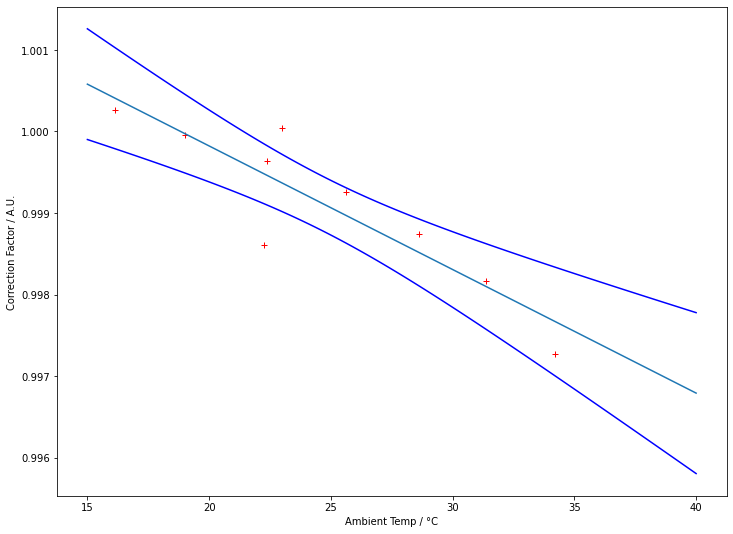

In [14]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(vecTemp, vecSens, 'r+')
ax.plot(vPlotTemp, get_value(vSensPoly))
ax.plot(vPlotTemp, get_value(vSensPoly)+get_stdunc(vSensPoly), 'b')
ax.plot(vPlotTemp, get_value(vSensPoly)-get_stdunc(vSensPoly), 'b')
ax.set_xlabel('Ambient Temp / °C')
ax.set_ylabel('Correction Factor / A.U.')
plt.savefig('test.pdf', dpi=150)
plt.show()